# Arrest Data

#### In order to have a safe city, one of the most important things we can look at is the arrest data. Thanks to the arrest dataset, we can see each arrest and group it in many different ways, including the type of arrest and location. With more serious crimes having a bigger weight, as well as a more dense area of crimes, we can put all of this data together to find the safest neighborhood.

To begin, we need to import our dataset. I labeled it "arrestInfo" so it will be easier to keep track of down the road.

![cuffs](https://c.tenor.com/bsmi3Ccn1iQAAAAC/handcuffs-prison.gif)

In [1]:
import pandas as pd
%matplotlib inline
arrestInfo = pd.read_csv('arrestData.csv')
arrestInfo

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66478,88274,2064627,23175998,40.0,M,W,2023-11-05T16:19:00,"1400 Block Sheffield ST Pittsburgh, PA 15233",3304 Criminal Mischief. / 3502 Burglary. / 392...,"1400 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.026065,40.453105
66479,88275,2064628,23179042,44.0,F,B,2023-11-11T03:41:00,"900 Block Brookline BL Pittsburgh, PA 15226",5104 Resisting Arrest or Other Law Enforcement...,"900 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.019190,40.392879
66480,88276,2064629,23140205,18.0,M,B,2023-11-04T00:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN
66481,88277,2064630,23146375,32.0,M,B,2023-09-14T23:44:00,"1000 Block Airport BL Pittsburgh, PA 15231",9501 Bench Warrant,"1000 Block Airport BL Pittsburgh, PA 15231",Outside City,OSC,5599.0,NaN,NaN,-80.255272,40.496059


## Keeping It Simple

This dataset is a complete mess...there are columns that are helpfully labeled, but there is simply too much information to display. What we need to do is write some more code to categorize this data into what we really need.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2701 Simple Assault.'),
  Text(1, 0, '9015 Failure To Appear/Arrest on Attachment Order'),
  Text(2, 0, '9501 Bench Warrant'),
  Text(3, 0, '13(a)(32) Paraphernalia - Use or Possession'),
  Text(4, 0, '2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury'),
  Text(5, 0, '13(a)(31) Marijuana: Possession Small Amount'),
  Text(6, 0, '13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession'),
  Text(7, 0, '2701 Simple Assault. / 2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck'),
  Text(8, 0, '9093 Indirect Criminal Contempt'),
  Text(9, 0, '3929 Retail Theft.')])

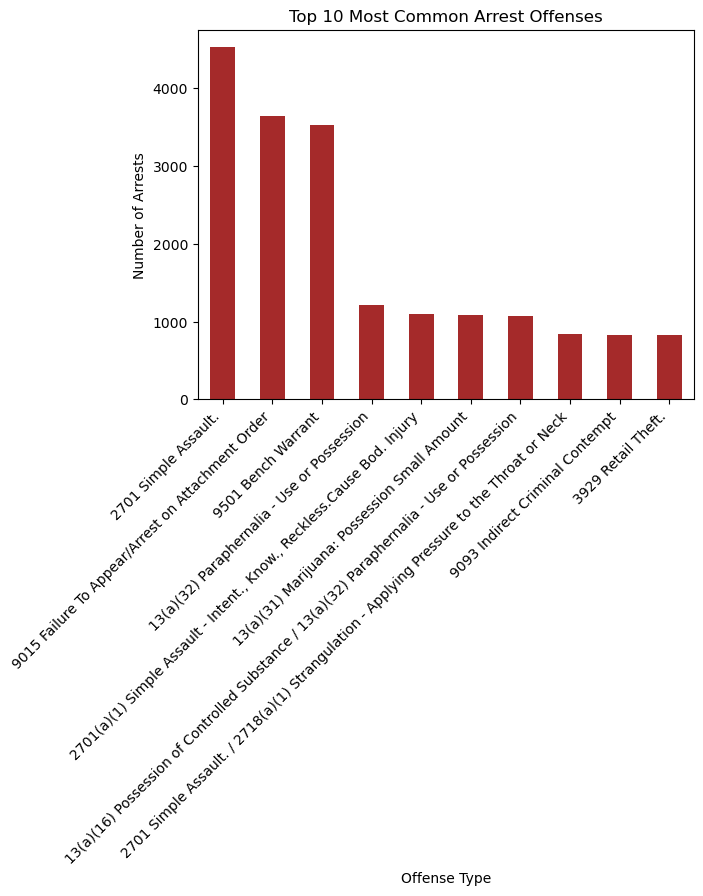

In [137]:
import matplotlib.pyplot as plt

# Count the occurrences of each offense and select the top 10
offense_counts = arrestInfo['OFFENSES'].value_counts().head(10)

# Create a bar graph for the 10
offense_counts.plot(kind='bar', color='brown')
plt.title('Top 10 Most Common Arrest Offenses')
plt.xlabel('Offense Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels slightly

Okay...so now we need to take a look at our data. Seeing this information, there are two columns that are very similar to each other, two times. Failure to appear and bench warrant are pretty much the same, and so are the two columns for paraphernalia.

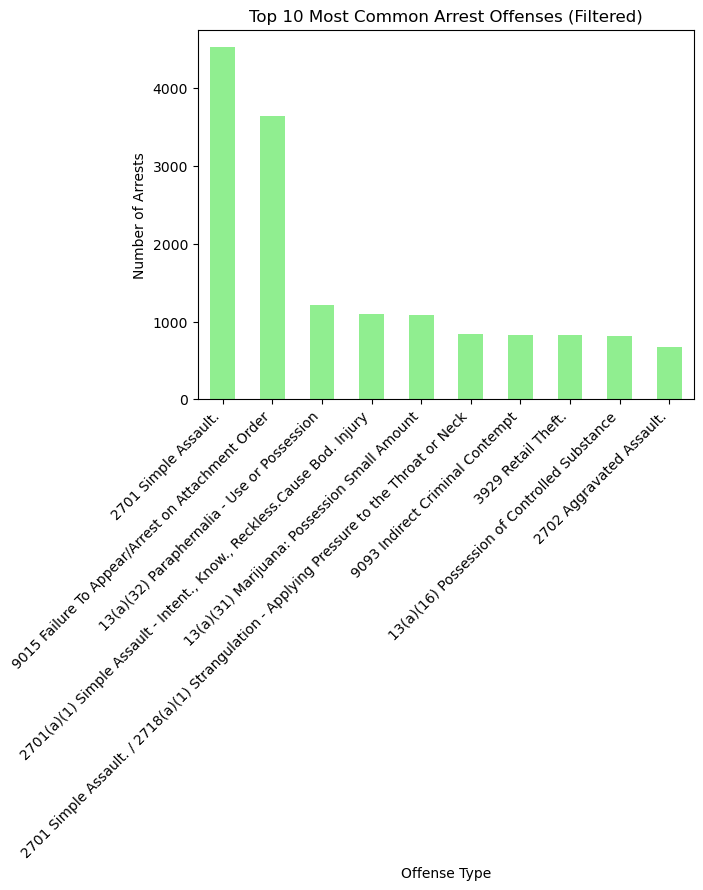

In [133]:
# Remove rows where the OFFENSES column has the value for warrant and paraphernalia
values_to_remove = ['9501 Bench Warrant', '13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession']
arrestInfo_filtered = arrestInfo[~arrestInfo['OFFENSES'].isin(values_to_remove)]

# Display the updated DataFrame
arrestInfo_filtered.head()

# Count the occurrences of each offense in the filtered data
offense_counts_filtered = arrestInfo_filtered['OFFENSES'].value_counts().head(10)

# Create a bar graph
offense_counts_filtered.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Common Arrest Offenses (Filtered)')
plt.xlabel('Offense Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

Now, we have this information, but we need to implement it into actual neighborhoods.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mt. Oliver Neighborhood'),
  Text(1, 0, 'Troy Hill-Herrs Island'),
  Text(2, 0, 'Mt. Oliver Boro'),
  Text(3, 0, 'Central Northside'),
  Text(4, 0, 'Ridgemont'),
  Text(5, 0, 'Regent Square'),
  Text(6, 0, 'New Homestead'),
  Text(7, 0, 'Swisshelm Park'),
  Text(8, 0, 'Chartiers City'),
  Text(9, 0, 'East Carnegie')])

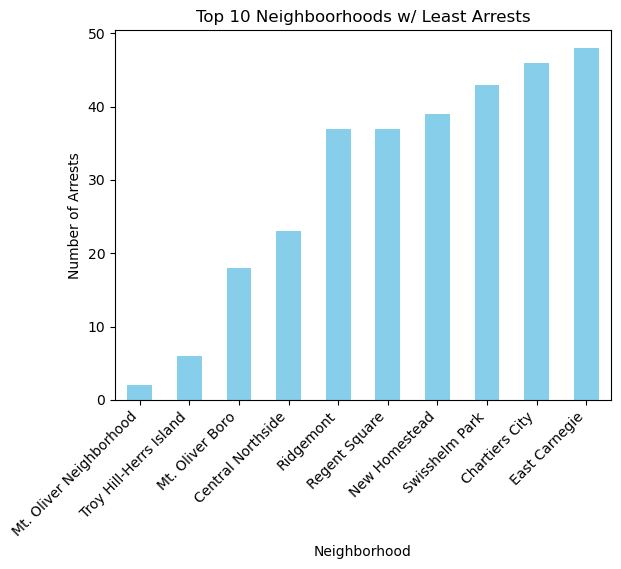

In [131]:
# Count the occurrences of each offense and select the top 10
offense_counts = arrestInfo['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True).head(10)

# Create a bar graph for the top 10 offenses
offense_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighboorhoods w/ Least Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels slightly

When we take a look at the most common crimes, it seems like we can sort them into two categories: physical crimes and non-physical ones. We want to be able to sort these low-crime neighborhoods with as minimal physical crimes as possible. For example, if New Homestead has more crimes then Regent Square, but Regent has more assaults, New Homestead is probably the safer neighborhood.

                         Total Incidents  Assault Cases
INCIDENTNEIGHBORHOOD                                   
Troy Hill-Herrs Island                 6            0.0
Central Northside                     23            1.0
Mt. Oliver Neighborhood                2            1.0
Mt. Oliver Boro                       18            5.0
Regent Square                         37            6.0
Ridgemont                             37            8.0
New Homestead                         39           14.0
Swisshelm Park                        43           19.0
East Carnegie                         48           21.0
Chartiers City                        46           22.0


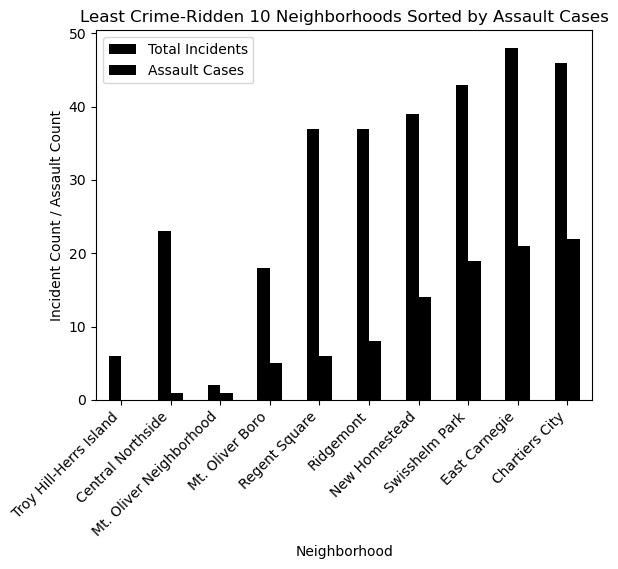

In [97]:
import pandas as pd

#Count incidents in each neighborhood and get the bottom 10 neighborhoods with the least incidents
neighborhood_incidents = arrestInfo['INCIDENTNEIGHBORHOOD'].value_counts().tail(10)

#Filter the arrest data to include only the bottom 10 neighborhoods
bottom10 = arrestInfo[arrestInfo['INCIDENTNEIGHBORHOOD'].isin(neighborhood_incidents.index)]

#Identify assault cases 
assault_cases = bottom10[bottom10['OFFENSES'].str.contains('Assault')]

#Count assault cases in each of the bottom 10 neighborhoods
assault_counts = assault_cases['INCIDENTNEIGHBORHOOD'].value_counts()

# Merge the assault count with the original neighborhood incidents to compare
neighborhood_info['Assault Cases'] = assault_counts

# Use fillna function for default cases
neighborhood_info['Assault Cases'] = neighborhood_info['Assault Cases'].fillna(0)

# Sort the neighborhoods by the number of assault cases in ascending order
neighborhood_info_sorted = neighborhood_info.sort_values(by='Assault Cases')

# Display the sorted neighborhoods with their incident and assault case counts
print(neighborhood_info_sorted)

neighborhood_info_sorted.plot(kind='bar', color='black')
plt.title('Least Crime-Ridden 10 Neighborhoods Sorted by Assault Cases')
plt.xlabel('Neighborhood')
plt.ylabel('Incident Count / Assault Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Conclusion

Overall there were many neighborhoods with not many cases, but there were a few that stood out. Thanks to the ability to compare the type of crime, and put it against the lowest crime-ridden neighborhoods, we were able to conclude that in my dataset, the safest neighborhood is Troy Hill-Herrs Island, with Central Northside and Mt. Oliver Neighborhood coming in close 2nd and 3rd places, respectively.